In [1]:
## Accéder aux fichiers de 'checkpoint' depuis Google Drive : 
#from google.colab import drive
#drive.mount('/content/gdrive')
#%cd /content/gdrive/MyDrive/MVA/RecVis/KaggleCompetition/


##### Detectron2 installation on google colab: 

In [2]:
!pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime


     |█▏                              | 10 kB 25.2 MB/s eta 0:00:01
     |██▍                             | 20 kB 25.6 MB/s eta 0:00:01
     |███▋                            | 30 kB 18.4 MB/s eta 0:00:01
     |████▉                           | 40 kB 15.7 MB/s eta 0:00:01
     |██████                          | 51 kB 8.1 MB/s eta 0:00:01
     |███████▏                        | 61 kB 9.5 MB/s eta 0:00:01
     |████████▍                       | 71 kB 8.8 MB/s eta 0:00:01
     |█████████▋                      | 81 kB 9.7 MB/s eta 0:00:01
     |██████████▊                     | 92 kB 7.8 MB/s eta 0:00:01
     |████████████                    | 102 kB 8.0 MB/s eta 0:00:01
     |█████████████▏                  | 112 kB 8.0 MB/s eta 0:00:01
     |██████████████▍                 | 122 kB 8.0 MB/s eta 0:00:01
     |███████████████▌                | 133 kB 8.0 MB/s eta 0:00:01
     |████████████████▊               | 143 kB 8.0 MB/s eta 0:00:01
     |██████████████████              | 153 kB 8.0 M

In [4]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from glob import glob
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

from crop_functions import crop_object, bird_extraction

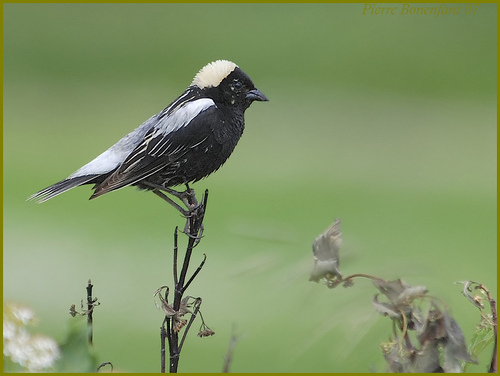

In [5]:
im = cv2.imread("bird_dataset/train_images/013.Bobolink/Bobolink_0002_11085.jpg")
cv2_imshow(im)

In [6]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.01 # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_2d9806.pkl: 431MB [00:05, 78.8MB/s]                           
/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [7]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)
print(outputs["instances"].scores)

tensor([14, 14, 14, 75], device='cuda:0')
Boxes(tensor([[ 23.5541,  59.8362, 269.2646, 229.9153],
        [310.6812, 219.1396, 342.2975, 282.5910],
        [308.2014, 219.8688, 481.1300, 348.4635],
        [379.5382, 335.6684, 443.4362, 372.3571]], device='cuda:0'))
tensor([0.9973, 0.9087, 0.0385, 0.0258], device='cuda:0')


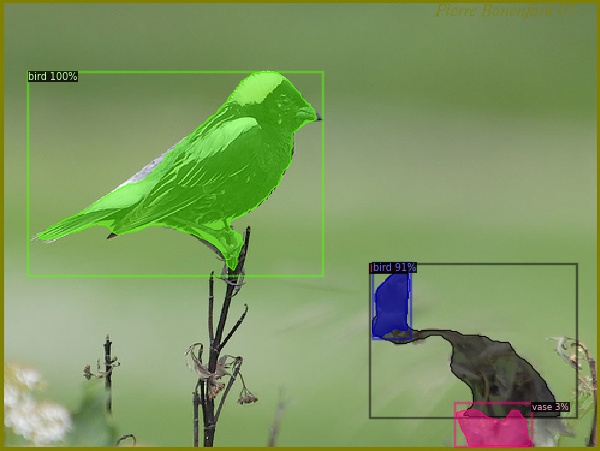

In [ ]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


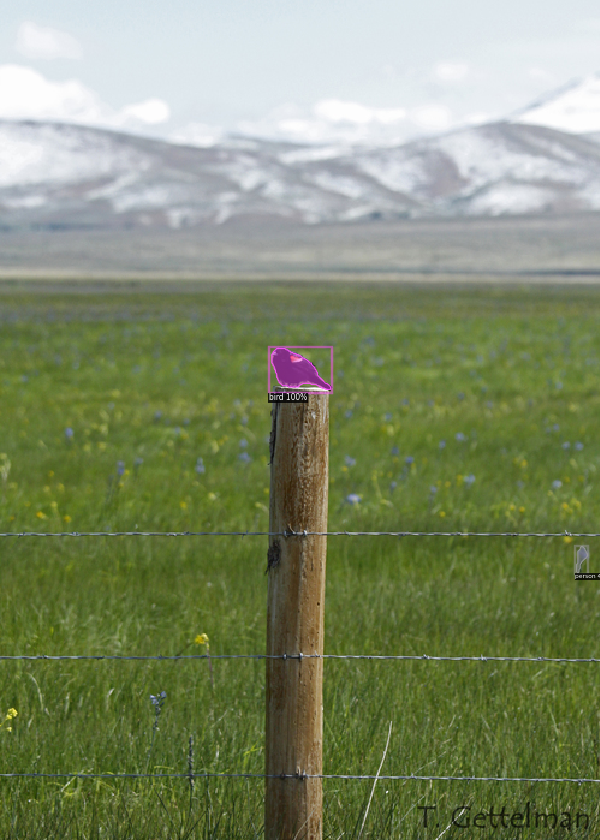

In [ ]:
img_path = "mva-recvis-2021/bird_dataset/test_images/mistery_category/fb97b3a7197b6f5f856782d39fa14f49.jpg"
im = cv2.imread("mva-recvis-2021/bird_dataset/test_images/mistery_category/dbe9c4f1287fb16ff4658aff9c318d5e.jpg")
outputs = predictor(im)

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

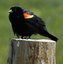

In [ ]:
im = cv2.imread("mva-recvis-2021/bird_dataset/test_images/mistery_category/dbe9c4f1287fb16ff4658aff9c318d5e.jpg")
# Get pred_boxes from Detectron2 prediction outputs
boxes = outputs["instances"].pred_boxes
# Select 1 box:
box = list(boxes)[0].detach().cpu().numpy()
# Crop the image using predicted box coordinates
crop_img = crop_object(im, box)

# Creating the data set : 

In [ ]:
if not os.path.isdir('./croped_dataset'):
    os.makedirs('./croped_dataset')

In [ ]:
for path in glob("mva-recvis-2021/bird_dataset/*/*/*"): 
  print(path)
  ## Creating croped image : 
  croped_img = bird_extraction(predictor, str(path))
  ## New path : 
  if len(path.split('/')) == 5 : 
    img_path = path.split('/')[-3:-1]
    new_path = 'croped_dataset/' + '/'.join(img_path)
    os.makedirs(new_path, exist_ok=True) 
  else : 
    img_path = path.split('/')[-4:-1]
    new_path = 'croped_dataset/' + '/'.join(img_path)
    os.makedirs(new_path, exist_ok=True) 
  ## save to new path : 
  cv2.imwrite(new_path + '/' + path.split('/')[-1], croped_img)

mva-recvis-2021/bird_dataset/test_images/mistery_category/0247efd7b9d47d036bb4390202a13e69.jpg


/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


mva-recvis-2021/bird_dataset/test_images/mistery_category/0267548c2aac82fe3d7e37ae98b00bd7.jpg
mva-recvis-2021/bird_dataset/test_images/mistery_category/002f61512a368e4c1434eedacf609957.jpg
mva-recvis-2021/bird_dataset/test_images/mistery_category/030c7d18b20ee586db3b74d9966c0348.jpg
mva-recvis-2021/bird_dataset/test_images/mistery_category/034abbbb69336b0de7c7c0f2aa1267a6.jpg
mva-recvis-2021/bird_dataset/test_images/mistery_category/035f7f6b1a162d86bb4755e6558f33d9.jpg
mva-recvis-2021/bird_dataset/test_images/mistery_category/038872d6dfc340d0ff11f8d3c99d026e.jpg
mva-recvis-2021/bird_dataset/test_images/mistery_category/03b5b072b80ec04df1dee668f44abad4.jpg
mva-recvis-2021/bird_dataset/test_images/mistery_category/045ed95be146d994cfe64be27e1c936a.jpg
mva-recvis-2021/bird_dataset/test_images/mistery_category/046356594366559d408353df3711de5e.jpg
mva-recvis-2021/bird_dataset/test_images/mistery_category/04c2ed055c16441bc123f341ff172128.jpg
mva-recvis-2021/bird_dataset/test_images/mistery_c